# FUNGUS MYCETOMA CLASSIFICATION

## Method : linear model

<p> Reminders about data :
    <ul>
        <li> FM : fungus / BM : bacterial
        <li> label = type + n°patient + _ + n°grain
    </ul>
</p>

In [1]:
%run dataManagementPart2.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics, svm

from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix

##### 1) Getting data

In [3]:
file1 = './Data/radiomics_features_set1.csv'
file2 = './Data/radiomics_features_set2.csv'

In [4]:
data = readCSV(file1,file2)

In [5]:
# fungus mycetoma type
y = getLabels(data)[1]

# associated data
X = getData(data)[1]

(206, 102) (37, 102) (16, 102)


##### 2) Balancing data

In [6]:
nb1 = y.count(1)
nb2 = y.count(2)
print("Number of type 1 :",nb1)
print("Number of type 2 :",nb2)

balanced_y = []
balanced_X = []

cpt = 0
for i in range(len(y)):
    if y[i] == 1 and cpt != nb2:
        balanced_y.append(y[i])
        balanced_X.append(data.iloc[i])
        cpt += 1
    elif y[i] == 2:
        balanced_y.append(y[i])
        balanced_X.append(X.iloc[i,:])

y = balanced_y 
X = pd.DataFrame(balanced_X,index=[i for i in range(nb2*2)],columns=X.columns)

nb1_end = y.count(1)
nb2_end = y.count(2)
print("Number of type 1 :",nb1_end)
print("Number of type 2 :",nb2_end)

Number of type 1 : 166
Number of type 2 : 111
Number of type 1 : 111
Number of type 2 : 111


##### 3) Defining training and testing data

In [7]:
# preprocessing the data to remove negative numbers
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training data dimension :",X_train.shape)
print("Test data dimension :",X_test.shape)

Training data dimension : (166, 102)
Test data dimension : (56, 102)


##### 4) Learning

- Logistic regression

In [9]:
LR = LogisticRegression()

In [10]:
y_LR = LR.fit(X_train,y_train).predict(X_test)

- Support Vector Machines

In [11]:
SVM = svm.SVC()

In [12]:
y_SVM = SVM.fit(X_train,y_train).predict(X_test)

- Linear Discriminant Analysis

In [13]:
LDA = LinearDiscriminantAnalysis()

In [14]:
y_LDA = LDA.fit(X_train,y_train).predict(X_test)

- KNeighbors Classifier

In [15]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [16]:
y_KNN = KNN.fit(X_train,y_train).predict(X_test)

##### 5) Testing

- cross-validation

In [17]:
cv_LR = cross_val_score(LR, X, y)
print("---> with logistic regression :", cv_LR)

---> with logidtic regression : [0.75555556 0.75555556 0.70454545 0.72727273 0.79545455]


In [18]:
cv_SVM = cross_val_score(SVM, X, y)
print("---> with support vector machine : ",cv_SVM )

---> with support vector machine :  [0.66666667 0.73333333 0.65909091 0.72727273 0.81818182]


In [19]:
cv_LDA = cross_val_score(LDA, X, y)
print("---> with linear discriminant analysis :",cv_LDA)

---> with linear discriminant analysis : [0.77777778 0.75555556 0.77272727 0.81818182 0.79545455]


In [21]:
cv_KNN = cross_val_score(KNN, X, y)
print("---> with kneighbors classifier :",cv_KNN )

---> with kneighbors classifier : [0.62222222 0.68888889 0.63636364 0.72727273 0.70454545]


- confusion matrix

---> with logistic regression :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

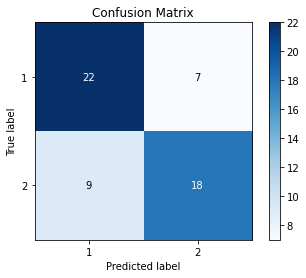

In [22]:
print("---> with logistic regression :")
plot_confusion_matrix(y_test,y_LR)

---> with support vector machine :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

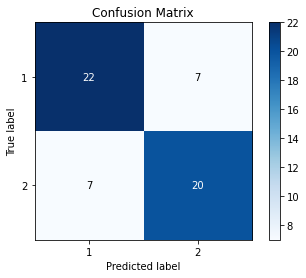

In [23]:
print("---> with support vector machine :")
plot_confusion_matrix(y_test,y_SVM)

---> with linear discriminant analysis :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

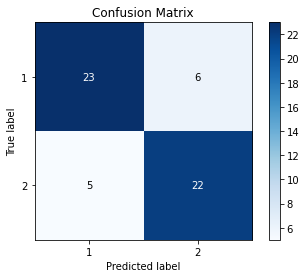

In [24]:
print("---> with linear discriminant analysis :")
plot_confusion_matrix(y_test,y_LDA)

---> with kneighbors classifier :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

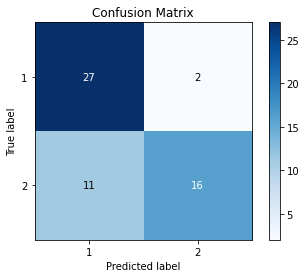

In [25]:
print("---> with kneighbors classifier :")
plot_confusion_matrix(y_test,y_KNN)

- precision, recall, F-measure

In [28]:
f1_LR = f1_score(y_test,y_LR)
print("---> with logistic regression :",f1_LR)

---> with logistic regression : 0.7333333333333333


In [27]:
f1_SVM = f1_score(y_test,y_SVM)
print("---> with support vector machines :",f1_SVM)

---> with support vector machines :  0.7586206896551724


In [30]:
f1_LDA = f1_score(y_test,y_LDA)
print("---> with linear discriminant analysis :",f1_LDA)

---> with linear discriminant analysis : 0.8070175438596492


In [31]:
f1_KNN = f1_score(y_test,y_KNN)
print("---> with kneighbors classifier : ",f1_KNN)

---> with kneighbors classifier :  0.8059701492537312


- roc curves

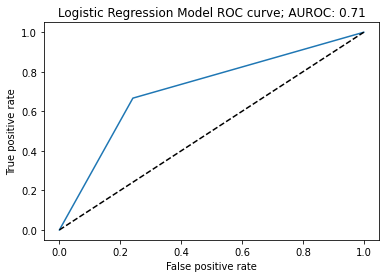

In [34]:
fpr,tpr,thresholds = roc_curve(y_test,y_LR,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_LR), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

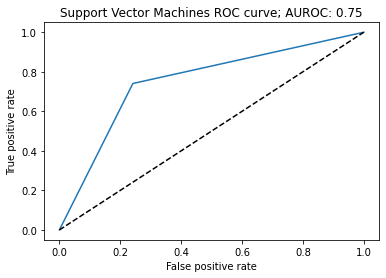

In [35]:
fpr,tpr,thresholds = roc_curve(y_test,y_SVM,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_SVM), 2)

plt.title(f'Support Vector Machines ROC curve; AUROC: {AUROC}');
plt.show()

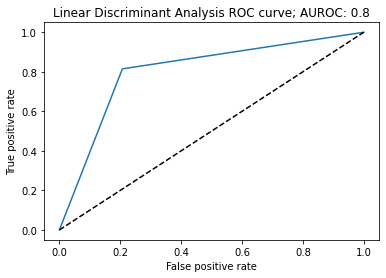

In [36]:
fpr,tpr,thresholds = roc_curve(y_test,y_LDA,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_LDA), 2)

plt.title(f'Linear Discriminant Analysis ROC curve; AUROC: {AUROC}');
plt.show()

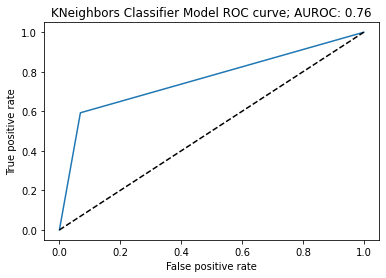

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_KNN,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_KNN), 2)

plt.title(f'KNeighbors Classifier Model ROC curve; AUROC: {AUROC}');
plt.show()